## In class Exercise 5
The purpose of this exercise is to practice different ML algorithms for text classification, text clustering, and model evaluation.

Hint: You might want to use the code demos from previous lectures, where suitable.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight December 6th, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

### Question 1.

The purpose of this question is to practice different machine learning algorithms for text classification, along with performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset (see Canvas) contains two files train data and test data for sentiment analysis in IMDB review, and it has two categories: 1 represents positive and 0 represents negative.

You need to split the training data into training and validation data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model needs to be evaluated on the test data.

Algorithms:
1. MultinominalNB (2 points)
2. SVM (2 points)
3. KNN (2 points)
4. Decision tree (2 points)
5. Random Forest (2 points)
6. XGBoost (2 points)

Evaluation measurement:
1. Accuracy (2 points)
2. Recall (2 points)
3. Precison (2 points)
4. F-1 score (2 points)

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier

In [13]:
train_dfrme = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train_dfrme[['Sentiment','Text']] = train_dfrme["Text"].str.split(" ", 1, expand=True)

train_dfrme.head()

<ipython-input-13-e5129352b765>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_dfrme = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-13-e5129352b765>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_dfrme[['Sentiment','Text']] = train_dfrme["Text"].str.split(" ", 1, expand=True)


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [14]:
test_dfrme = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test_dfrme[['Sentiment','Text']] = test_dfrme["Text"].str.split(" ", 1, expand=True)
test_dfrme.head()

<ipython-input-14-e6b42a753b65>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_dfrme = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-14-e6b42a753b65>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test_dfrme[['Sentiment','Text']] = test_dfrme["Text"].str.split(" ", 1, expand=True)


,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [23]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def clean_text(txt):
  txt="".join([w.lower() for w in txt if w not in string.punctuation])
  txt = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", txt)
  tok = re.split('\W+',txt)
  txt = [w_l.lemmatize(w1) for w1 in tok if w1 not in stopword]
  return txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming train_dfrme['Text'] is your training text data
tf_vect = TfidfVectorizer()
X_idf = tf_vect.fit_transform(train_dfrme['Text'])

print(X_idf.shape)

X_idf_dafrme = pd.DataFrame(X_idf.toarray(), columns=tf_vect.get_feature_names_out())

# Now X_idf_dafrme should have columns with feature names


# Now X_idf_dafrme should have columns with feature names

X_test_idf = tf_vect.transform(test_dfrme['Text'])
print(X_idf.shape)

(6920, 13789)
(6920, 13789)


In [30]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
x_train, x_test, y_train, y_test = train_test_split(X_idf_dafrme, train_dfrme['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Fit the Multinomial Naive Bayes model
MNB = MultinomialNB()
MNB.fit(x_train, y_train)

# Predict on the test set
Y_MNB = MNB.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_MNB)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_MNB))

# Evaluate using cross-validation
sco_MNB = cross_val_score(MNB, x_test, y_test, cv=10)
print("Accuracy using MNB:", sco_MNB.mean())


Accuracy: 0.7969653179190751
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       671
           1       0.76      0.89      0.82       713

    accuracy                           0.80      1384
   macro avg       0.81      0.79      0.79      1384
weighted avg       0.81      0.80      0.79      1384

Accuracy using MNB: 0.7434365551037432


In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Create and fit the Support Vector Machine (SVM) model
SVM = SVC()
SVM.fit(x_train, y_train)

# Predict on the test set
Y_SVM = SVM.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_SVM)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_SVM))

# Evaluate using cross-validation
sco_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy using SVM:", sco_SVM.mean())


Accuracy: 0.7976878612716763
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       671
           1       0.77      0.86      0.81       713

    accuracy                           0.80      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.80      0.80      0.80      1384

Accuracy using SVM: 0.7391147951204254


In [35]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the K-Nearest Neighbors (KNN) model
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

# Predict on the test set
Y_KNN = KNN.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_KNN)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_KNN))

# Evaluate using cross-validation
scores_KNN = cross_val_score(KNN, x_test, y_test, cv=10)
print("Accuracy using KNN:", scores_KNN.mean())


Accuracy: 0.7283236994219653
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       671
           1       0.71      0.79      0.75       713

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384

Accuracy using KNN: 0.6964706495673028


In [36]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree model
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

# Predict on the test set
Y_dec_tree = DT.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_dec_tree)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_dec_tree))

# Evaluate using cross-validation
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Accuracy of Decision Trees:", scores_DT.mean())


Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       671
           1       0.63      0.67      0.65       713

    accuracy                           0.62      1384
   macro avg       0.62      0.62      0.62      1384
weighted avg       0.62      0.62      0.62      1384

Accuracy of Decision Trees: 0.5831717234907725


In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

# Predict on the test set
Y_RF = RF.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_RF)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_RF))

# Evaluate using cross-validation
sco_RF = cross_val_score(RF, x_test, y_test, cv=10)
print("Accuracy using Random Forest:", sco_RF.mean())


Accuracy: 0.7160404624277457
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       671
           1       0.70      0.79      0.74       713

    accuracy                           0.72      1384
   macro avg       0.72      0.71      0.71      1384
weighted avg       0.72      0.72      0.71      1384

Accuracy using Random Forest: 0.6777186946095297


In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# Convert string representation to integers for target variable
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Now fit and use XGBoost as before
XGB = xgb.XGBClassifier()
XGB_test = XGB.fit(x_train, y_train)
Y_XGB = XGB_test.predict(x_test)


# Rest of the code for prediction, accuracy calculation, and cross-validation remains the same

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_XGB)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_XGB))

# Evaluate using cross-validation
sco_XGB = cross_val_score(XGB, x_test, y_test, cv=10)
print("Accuracy using XGBoost:", sco_XGB.mean())


Accuracy: 0.7232658959537572
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.69       671
           1       0.70      0.82      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.72      1384
weighted avg       0.73      0.72      0.72      1384

Accuracy using XGBoost: 0.6690386820978


### Question 2.

The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Apply the listed clustering methods to the dataset:
1. K-means (4 points)
2. DBSCAN (4 points)
3. Hierarchical clustering (4 points)
4. Word2Vec (4 points)
5. BERT (4 points)

In [44]:
#Write your code here.


import pandas as pd
sample_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
sample_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


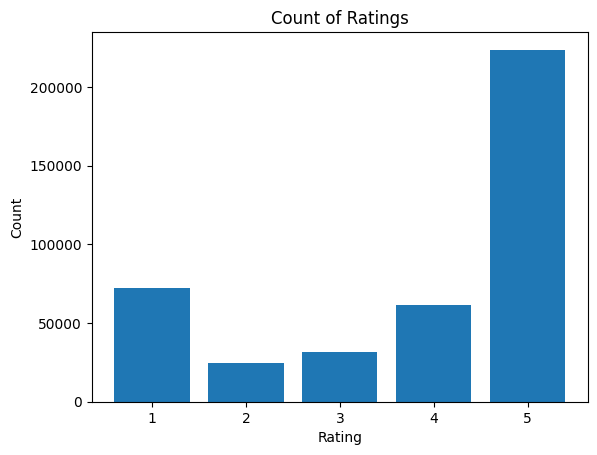

In [45]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'Rating'
rating_counts = sample_data['Rating'].value_counts()

# Create a bar plot using Matplotlib
plt.bar(rating_counts.index, rating_counts.values)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')

# Show plot
plt.show()


<Axes: xlabel='RatingPosNeg', ylabel='count'>

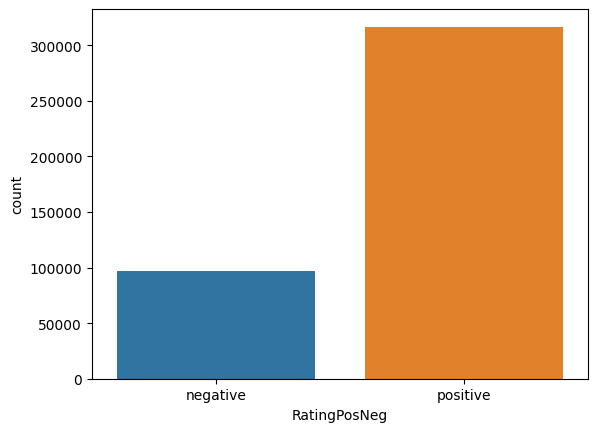

In [51]:
import seaborn as sns

# Define a function to categorize ratings
def categorize_rating(x):
    return 'negative' if x < 3 else 'positive'

# Apply the function using lambda and create a new column 'RatingPosNeg'
sample_data['RatingPosNeg'] = sample_data['Rating'].apply(lambda x: categorize_rating(x))

# Convert 'RatingPosNeg' to categorical data type
sample_data['RatingPosNeg'] = sample_data['RatingPosNeg'].astype('category')

# Plot count of RatingPosNeg categories using Seaborn
sns.countplot(data=sample_data, x='RatingPosNeg')


In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords
nltk.download('stopwords')

# Initialize Snowball stemmer for English
sno = SnowballStemmer('english')

# Get the set of English stopwords
st = set(stopwords.words('english'))

# Assuming 'sample_dat' is a typo, and the correct variable is 'sample_data'
# Then, you can use 'sample_data' as needed


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
import string

def clpunc(se):
    # Create translation table to replace punctuation with spaces
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))

    # Clean the text by translating punctuation to spaces
    clean_dt = se.translate(translator)

    return clean_dt


In [54]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(1)

# Get the number of rows in sample_data
num_rows = len(sample_data)

# Generate random indices for sampling 10,000 rows
random_indices = np.random.choice(num_rows, size=10000, replace=False)

# Use iloc to select rows based on random indices
final = sample_data.iloc[random_indices]


In [92]:
import re

i=0
st1=' '
fi_str=[]
all_pos_wrds=[]
all_neg_wrds=[]
s1=''
for se in final['Reviews'].values:
    fil_se=[]
    try:
      for w in se.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive':
                          all_pos_wrds.append(s)
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_neg_wrds.append(s)
                  else:
                      continue
              else:
                  continue
      str1 = b" ".join(fil_se)

      fi_str.append(str1)
      i+=1
    except AttributeError as e:
      fi_str.append('')
      i+=1

In [93]:
final['CleanedText']=fi_str
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
ct_vect = CountVectorizer()
bo = ct_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8392)


In [96]:
terms = ct_vect.get_feature_names_out()

In [97]:

# Display a sample of 'CleanedText' column to check content
print(final['CleanedText'].head())


103270    year realli complain gave teenag replac wait u...
297857                                        perfect thank
40075     back camera stop work phone touch screen stop ...
100790                                                 good
58055     complaint work fine still work perfect tear we...
Name: CleanedText, dtype: object


In [98]:
from sklearn.cluster import KMeans

# Assuming 'bo' is already initialized and fit_transformed on 'CleanedText' column
# Initialize KMeans with desired parameters
mod = KMeans(
    n_clusters=10,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=99
)

# Fit the KMeans model to the transformed data 'bo'
mod.fit(bo)


KMeans(n_clusters=10, n_init=10, random_state=99)

In [99]:
# Get cluster labels and cluster centers
labels = mod.labels_
cluster_centers = mod.cluster_centers_


In [100]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, labels, metric='euclidean')
silhouette_score


0.25924238516513703

In [101]:
# Create a copy of the 'final' DataFrame
dfrme = final.copy()

# Add 'Bow Clus Label' column with cluster labels from the KMeans model
dfrme['Bow Clus Label'] = mod.labels_

# Display the first two rows of the modified DataFrame
print(dfrme.head(2))


                                             Product Name   Brand Name  \
103270  BLU Advance 4.0L Unlocked Smartphone -Global G...          BLU   
297857  POSH MOBILE MICRO X, The Smallest Smartphone i...  Posh Mobile   

         Price  Rating                                            Reviews  \
103270  149.99       4  Had it for 1 year, can't really complain. Gave...   
297857   49.99       5                                    Perfect, thanks   

       Review Votes RatingPosNeg  \
103270          0.0     positive   
297857          1.0     positive   

                                        Processed_Reviews  \
103270  year realli complain gave teenag replac wait u...   
297857                                      perfect thank   

                                              CleanedText  Bow Clus Label  
103270  year realli complain gave teenag replac wait u...               8  
297857                                      perfect thank               0  


In [102]:
# Using value_counts() after filtering the DataFrame by cluster labels
counts = dfrme[dfrme['Bow Clus Label'].notnull()]['Bow Clus Label'].value_counts()

# Display the counts of reviews per cluster label
print(counts)


0    7366
8    1827
6     523
7     202
2      61
3      15
4       2
5       2
9       1
1       1
Name: Bow Clus Label, dtype: int64


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'final' contains your text data and 'CleanedText' is the processed column

# Initialize and fit the CountVectorizer
ct_vect = CountVectorizer()
bo = ct_vect.fit_transform(final['CleanedText'])

# Assuming 'mod' is the fitted KMeans model and 'num_clusters' is the number of clusters
num_clusters = 10
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]

print("Top terms per cluster:")
num_top_terms = 10

for i in range(num_clusters):
    print(f"Cluster {i}: ", end='')
    top_term_indices = ord_centroids[i, :num_top_terms]
    terms = ct_vect.get_feature_names_out()
    top_terms = [terms[idx] for idx in top_term_indices]
    print(' '.join(top_terms))


Top terms per cluster:
Cluster 0: phone work good great love use product excel like one
Cluster 1: phone take set camera batteri bad playlist cant price make
Cluster 2: phone use one work get screen like app sim camera
Cluster 3: phone use like screen good camera work get one time
Cluster 4: phone app use card instal flash screen wifi sim one
Cluster 5: use app screen favorit one phone display touch great chrome
Cluster 6: phone use work get like screen good one great batteri
Cluster 7: phone use like screen work get one batteri good would
Cluster 8: phone work use great one good like screen would love
Cluster 9: appl iphon android phone samsung year even know compani app


In [105]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % terms[i], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 work
 good
 great
 love
 use
 product
 excel
 like
 one
Cluster 1: phone
 take
 set
 camera
 batteri
 bad
 playlist
 cant
 price
 make
Cluster 2: phone
 use
 one
 work
 get
 screen
 like
 app
 sim
 camera
Cluster 3: phone
 use
 like
 screen
 good
 camera
 work
 get
 one
 time
Cluster 4: phone
 app
 use
 card
 instal
 flash
 screen
 wifi
 sim
 one
Cluster 5: use
 app
 screen
 favorit
 one
 phone
 display
 touch
 great
 chrome
Cluster 6: phone
 use
 work
 get
 like
 screen
 good
 one
 great
 batteri
Cluster 7: phone
 use
 like
 screen
 work
 get
 one
 batteri
 good
 would
Cluster 8: phone
 work
 use
 great
 one
 good
 like
 screen
 would
 love
Cluster 9: appl
 iphon
 android
 phone
 samsung
 year
 even
 know
 compani
 app


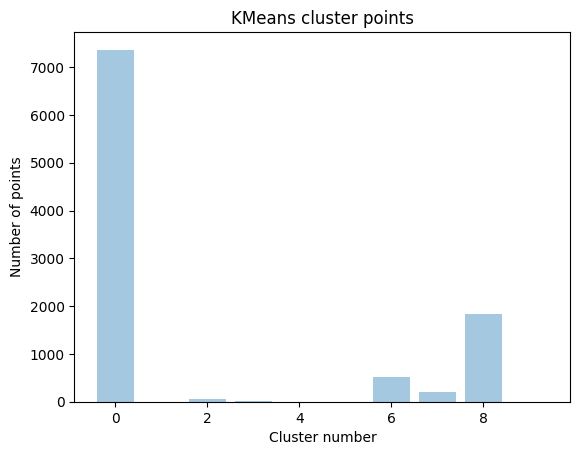

In [106]:
import matplotlib.pyplot as plt

# Assuming 'dfrme' contains your DataFrame and 'Bow Clus Label' is the column with cluster labels
cluster_counts = dfrme['Bow Clus Label'].value_counts().sort_index()

plt.bar(cluster_counts.index, cluster_counts.values, alpha=0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'final' contains your DataFrame and 'CleanedText' is the column with preprocessed text data
idf_vect = TfidfVectorizer()
idf = idf_vect.fit_transform(final['CleanedText'])

# Get the shape of the TF-IDF matrix
idf_shape = idf.shape
print("Shape of TF-IDF matrix:", idf_shape)


Shape of TF-IDF matrix: (10000, 8392)


In [108]:
from sklearn.cluster import KMeans

# Assuming 'idf' contains the TF-IDF matrix obtained from TfidfVectorizer

# Initialize KMeans with the number of clusters and random state
mod = KMeans(n_clusters=10, random_state=99)

# Fit KMeans to the TF-IDF matrix
mod.fit(idf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [110]:
lab_tf = mod.labels_
cluster_center_tf = mod.cluster_centers_
cluster_center_tf


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
terms = idf_vect.get_feature_names_out()
print(terms[1:10])  # Displaying a slice of the feature names


['aaaaaa' 'aac' 'aand' 'ab' 'abandon' 'abc' 'abd' 'abeautifulit' 'abierto']


In [113]:
from sklearn.metrics import silhouette_score

# Assuming 'idf' contains the TF-IDF matrix and 'lab_tf' contains the cluster labels

# Calculate the silhouette score
silhouette_score_tf = silhouette_score(idf, lab_tf, metric='euclidean')
print("Silhouette Score for TF-IDF:", silhouette_score_tf)


Silhouette Score for TF-IDF: 0.06345024030096161


In [114]:
dfrme1 = dfrme.copy()  # Make a copy of the DataFrame

# Assuming 'mod' contains the KMeans model and 'idf' contains the TF-IDF matrix

# Perform KMeans clustering and assign cluster labels to the new column
dfrme1['Tfidf Clus Label'] = KMeans(n_clusters=10, random_state=99).fit_predict(idf)

# Display the first 5 rows of the updated DataFrame
print(dfrme1.head(5))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                             Product Name   Brand Name  \
103270  BLU Advance 4.0L Unlocked Smartphone -Global G...          BLU   
297857  POSH MOBILE MICRO X, The Smallest Smartphone i...  Posh Mobile   
40075            Apple iPhone 5s 16GB (Silver) - T-Mobile        Apple   
100790  Blackberry Torch 9800 Unlocked Phone with 5 MP...   BlackBerry   
58055   Apple iPhone 6 Plus 64GB Unlocked Smartphone -...                

         Price  Rating                                            Reviews  \
103270  149.99       4  Had it for 1 year, can't really complain. Gave...   
297857   49.99       5                                    Perfect, thanks   
40075    75.65       1  the back camera stopped working, the phone tou...   
100790   82.62       5                                              Good!   
58055   529.99       5  no complaints. worked fine and still working p...   

       Review Votes RatingPosNeg  \
103270          0.0     positive   
297857          1.0 

In [115]:
# Assuming 'dfrme1' contains the DataFrame with 'Tfidf Clus Label' column

# Count the number of reviews per cluster label
reviews_per_cluster = dfrme1.groupby('Tfidf Clus Label')['Reviews'].count()
print(reviews_per_cluster)


Tfidf Clus Label
0     972
1    3203
2     245
3    3774
4     364
5     381
6     201
7     173
8     296
9     391
Name: Reviews, dtype: int64


In [117]:
# Assuming 'mod' is your KMeans model and 'ter' contains the feature names

print("Top terms per cluster:")
for i1, cluster_center in enumerate(mod.cluster_centers_):
    print(f"Cluster {i1}: ", end='')
    top_terms_indices = cluster_center.argsort()[::-1][:10]
    top_terms = [terms[i] for i in top_terms_indices]
    print(' '.join(top_terms))


Top terms per cluster:
Cluster 0: work phone well great fine good stop new use got
Cluster 1: phone use nice great good one like batteri get screen
Cluster 2: perfect work condit phone product love came everyth great excel
Cluster 3: good like product phone expect use time iphon great love
Cluster 4: excel product phone recommend love good seller price purchas servic
Cluster 5: great phone work price product buy condit deal good seller
Cluster 6: thank good excel much great phone love product work perfect
Cluster 7: excelent producto telefono celular recomendado súper telfono punto recomienda tlf
Cluster 8: love phone great new good son daughter iphon gift product
Cluster 9: good phone product price condit far qualiti work cell buy


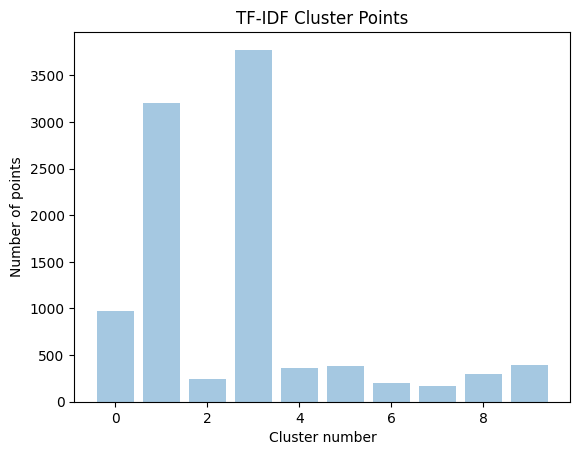

In [118]:
import matplotlib.pyplot as plt

# Assuming 'dfrme1' contains the DataFrame with 'Tfidf Clus Label' column

# Count the number of points per cluster label
cluster_counts = dfrme1['Tfidf Clus Label'].value_counts().sort_index()

# Create a bar plot
plt.bar(cluster_counts.index, cluster_counts.values, alpha=0.4)
plt.title('TF-IDF Cluster Points')
plt.xlabel('Cluster number')
plt.ylabel('Number of points')
plt.show()


In [119]:
# Assuming 'final' contains the DataFrame with the 'CleanedText' column

# Split each sentence and create a list of lists containing tokenized words
lst_of_sent = final['CleanedText'].apply(lambda x: x.split()).tolist()


In [120]:
import re

# Assuming 'final' contains the DataFrame with the 'CleanedText' column

def preprocess_text(sentence):
    filtered_sentence = []
    for word in sentence.split():
        for cleaned_word in re.sub(r'[^\w\s]', '', word).split():
            if cleaned_word.isalpha():
                filtered_sentence.append(cleaned_word.lower())
    return filtered_sentence

# Apply the preprocessing function to each sentence in the 'CleanedText' column
lst_sent_tr = final['CleanedText'].apply(preprocess_text).tolist()
print(lst_sent_tr)


[['year', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'keep', 'anymor', 'stay', 'charg', 'though', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'best', 'doabl'], ['perfect', 'thank'], ['back', 'camera', 'stop', 'work', 'phone', 'touch', 'screen', 'stop', 'work', 'restart', 'phone', 'get', 'work', 'phone', 'huge', 'disappoint', 'worth', 'paid'], ['good'], ['complaint', 'work', 'fine', 'still', 'work', 'perfect', 'tear', 'wear', 'sign', 'refurbish', 'phone'], ['hello', 'name', 'emildr', 'tower', 'buy', 'phone', 'provid', 'one', 'get', 'bad', 'light', 'due', 'situcion', 'pass', 'countri', 'make', 'refund', 'howev', 'notifi', 'happen', 'greet'], ['disappoint', 'bought', 'phone', 'mom', 'one', 'hard', 'hear', 'phone', 'ring', 'extrem', 'faint', 'ring', 'volum', 'cannot', 'increas', 'guess', 'get', 'pay'], ['perfect'], ['punto', 'excelent'], ['good'], ['overa

In [121]:
from gensim.models import Word2Vec

# Assuming 'lst_sent_tr' contains the list of tokenized sentences

# Define and train the Word2Vec model
w2v_mod = Word2Vec(sentences=lst_sent_tr, vector_size=100, workers=4)


In [122]:
import numpy as np

# Assuming 'lst_sent_tr' contains the list of tokenized sentences and 'w2v_mod' is the trained Word2Vec model

# Initialize an empty list to store sentence vectors
se_vecs = []

# Iterate through each sentence in lst_sent_tr
for se in lst_sent_tr:
    se_vec = np.zeros(100)  # Initialize a vector of zeros with size 100
    cnt_words = 0  # Counter to keep track of valid words

    # Iterate through each word in the sentence
    for word in se:
        try:
            # Attempt to fetch the word vector from the Word2Vec model
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except KeyError:
            # Ignore words not found in the model vocabulary
            pass

    # Calculate the average vector for the sentence
    if cnt_words != 0:
        se_vec /= cnt_words
    se_vecs.append(se_vec)

# Convert the list of sentence vectors to a NumPy array
se_vecs = np.array(se_vecs)

# Replace any NaN or inf values with zeros
se_vecs = np.nan_to_num(se_vecs)

# Check the shape of the resulting array
print(se_vecs.shape)


(10000, 100)


In [124]:
n_clu = list(range(3, 11))
n_clu


[3, 4, 5, 6, 7, 8, 9, 10]

In [126]:
squared_errors = []
optimal_clusters = None
min_error = float('inf')

for cluster in n_clu:
    kmeans = KMeans(n_clusters=cluster).fit(se_vecs)
    squared_error = kmeans.inertia_
    squared_errors.append(squared_error)

    if squared_error < min_error:
        min_error = squared_error
        optimal_clusters = cluster

print("The optimal number of clusters obtained is -", optimal_clusters)
print("The loss for optimal cluster is -", min_error)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal number of clusters obtained is - 10
The loss for optimal cluster is - 6022.410159862375


In [127]:
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=optimal_clusters)
model2.fit(se_vecs)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [128]:
word_cluster_pred = model2.predict(se_vecs)
word_cluster_pred_2 = model2.labels_
word_cluster_center = model2.cluster_centers_
cluster_center_example = word_cluster_center[1:2]


In [129]:
dafrme = dfrme1.copy()
dafrme['AVG-W2V Clus Label'] = model2.labels_
dafrme.head(2)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,Processed_Reviews,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year realli complain gave teenag replac wait u...,year realli complain gave teenag replac wait u...,8,1,4
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,perfect thank,0,6,8


In [130]:
from sklearn.neighbors import NearestNeighbors

mi_Pts = 2 * 100

def compute200thnearestneighbour(x, data):
    nbrs = NearestNeighbors(n_neighbors=mi_Pts).fit(data)
    distances, _ = nbrs.kneighbors([x])
    return distances[0][-1]

# Example usage:
# Replace 'sample_data' with your data and 'sample_point' with the point for which you want to compute the distance
# result = compute200thnearestneighbour(sample_point, sample_data)


In [131]:
from sklearn.neighbors import NearestNeighbors

mi_Pts = 2 * 100

def compute200thnearestneighbour(x, data):
    nbrs = NearestNeighbors(n_neighbors=mi_Pts).fit(data)
    distances, _ = nbrs.kneighbors([x])
    return distances[0][-1]

# Calculate 200th nearest neighbor for each vector in se_vecs[:1500]
two_hund_neigh = [compute200thnearestneighbour(v, se_vecs[:1500]) for v in se_vecs[:1500]]
two_hund_neigh.sort()


In [132]:
from sklearn.cluster import DBSCAN

mod_DB = DBSCAN(eps=5, min_samples=mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)


DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [133]:
dfrme_db = dafrme.copy()
dfrme_db['AVG-W2V Clus Label'] = mod_DB.labels_
dfrme_db.head(2)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,Processed_Reviews,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year realli complain gave teenag replac wait u...,year realli complain gave teenag replac wait u...,8,1,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,perfect thank,0,6,0


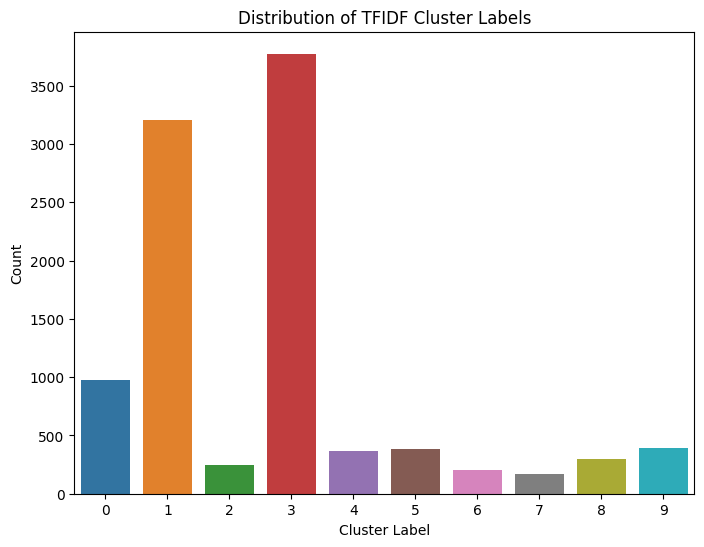

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=dfrme_db, x='Tfidf Clus Label')
plt.title('Distribution of TFIDF Cluster Labels')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

K-means is a data grouping technique that reveals the centroids of the groupings of data by randomly assigning k points based on how similar the data are. Data is saved in groups with higher data densities using the density-based clustering method DBSCAN, while lower densities are stored as noise. In order to create nodes that resemble a hierarchical tree, hierarchical clustering entails repeatedly joining each document or data point with the most comparable ones.